# Gaussian Elimination

<b>Reference:</b> Chapter 7 of <em>Computational Nuclear Engineering and Radiological Science Using Python</em>, R. McClarren (2018)

## Learning Objectives
After studying this notebook, completing the activities, and asking questions in class, you should be able to:
* Perform Gaussian elimination and backward substitution (a.k.a., row reduction) calculations in Python.
* For Gaussian elimination with partial pivoting, explain the following:
  * Why is it important? What are the benefits?
  * How does the algorithm work? What are the basic steps?
  * What are the limitations? In what cases will partial pivoting not work?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#this line is only needed in Jupyter notebooks
%matplotlib inline

## Motivating Example and Gaussian Elimination

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
Note: Gaussian Elimination is also known as **row reduction**.
</div>

We want to solve the following system:

$$3 x_1 + 2 x_2 + x_3 = 6$$
$$-x_1 + 4 x_2 + 5x_3 = 8$$
$$2x_1 -8 x_2 + 10 x_3 = 4$$

In matrix form this looks like

$$\underbrace{\begin{pmatrix} 3 & 2 & 1\\ -1 & 4 & 5\\ 2& -8 & 10\end{pmatrix}}_{\mathbf{A}} ~
\underbrace{\begin{pmatrix} x_1\\x_2\\x_3\end{pmatrix}}_{\mathbf{x}} = \underbrace{\begin{pmatrix}6\\8\\4\end{pmatrix}}_{\mathbf{b}}
$$

Another way to write this is a notational shorthand called an **augmented matrix**, where we put the righthand side into the matrix:

$$
\left(\begin{array}{ccc|c}   3 & 2 & 1 &6\\ -1 & 4 & 5&8\\ 2& -8 & 10&4\end{array}\right)
$$

How would you solve this? **Gaussian elimination** (a.k.a. row reduction), covered in linear algebra, is the way to go.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Perform Gaussian elimination with pencil and paper to convert the above matrix into row echelon form (e.g., all zeros below the diagonal).
</div>

Now that you have solved the system of equations "by hand", we will walk through the step in Python. First, let's assemble to augmented matrix.

In [2]:
# Declare matrix
A33 = np.matrix([(3,2,1),(-1,4,5),(2,-8,10)])
b3 = np.matrix([6,8,4])

# Assemble augmented matrix
# Study question: Why is it important to use .copy() here?
aug_matrix = np.zeros((3,4))
aug_matrix[0:3,0:3] = A33.copy() 
aug_matrix[:,3] = b3.copy() # Why do we access column 4 with index 3?

print(aug_matrix)

[[ 3.  2.  1.  6.]
 [-1.  4.  5.  8.]
 [ 2. -8. 10.  4.]]


<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;">  <b>Home Activity</b>: Why it is important to use <tt>.copy()</tt> in the above code? Record your multiple choice answer (1, 2, or 3) in <tt>ans_6b</tt> below.
</div>

Multiple choice options:
1. Nice try with the trick question! We actually do not need to use `.copy()`
2. By default, `=` without `.copy()` creates a "pointer" to the original numpy matrix. Thus when we change `aug_matrix`, we would also change `A33` and/or `b3`.
3. Neither of these answers are correct.

In [3]:
### BEGIN SOLUTION
ans_6b = 2
### END SOLUTION

In [4]:
### BEGIN HIDDEN TESTS
ans_6b_copy_secret = 2

assert ans_6b == ans_6b_copy_secret, "Check your notes from Class 3"
### END HIDDEN TESTS

### Gaussian Elimination: Take Care of First Column

We will now walk through the Guassian elimination steps in Python. These steps should match your paper and pencil work from a previous home activity.

**Step 1**: Eliminate the **-1** in the first column, second row.

Multiply first row by (1/3) and add to second row:

In [5]:
#add row 2 to 1/3 times row 1
row13 = aug_matrix[0]/3 #row1 * 1/3
new_row2 = aug_matrix[1] + row13 #add 1/3 row 1 to row 2
#replace row 2
aug_matrix[1,:] = new_row2
print("New matrix =\n",aug_matrix)

New matrix =
 [[ 3.          2.          1.          6.        ]
 [ 0.          4.66666667  5.33333333 10.        ]
 [ 2.         -8.         10.          4.        ]]


**Step 2**: Eliminate **2** in first column.

Multiply first row by (-2/3) and add to third row:

In [6]:
#add row 3 to -2/3 times row 1
row23 = -2*aug_matrix[0]/3 #row1 * -2/3
new_row3 = aug_matrix[2] + row23 #add -2/3 row 1 to row 3
#replace row 3
aug_matrix[2] = new_row3
print("New matrix =\n",aug_matrix)

New matrix =
 [[ 3.          2.          1.          6.        ]
 [ 0.          4.66666667  5.33333333 10.        ]
 [ 0.         -9.33333333  9.33333333  0.        ]]


### Gaussian Elimination: Take Care of Second Column

**Step 3**: Eliminate **-9$\frac{1}{3}$** from the last row.

Multiply row 2 by 9$\frac{1}{3}$/4$\frac{2}{3}$ and add to last row:

In [7]:
#add row 3 to 9.33333/4.66666 times row 2
modrow = (9+1./3)/(4+2./3)*aug_matrix[1] #row2 * (-9+1./3)/(4+2.0/3)
new_row3 = aug_matrix[2] + modrow #add -2/3 row 1 to row 3
#replace row 3
aug_matrix[2] = new_row3.copy()
print("New matrix =\n",aug_matrix)

New matrix =
 [[ 3.          2.          1.          6.        ]
 [ 0.          4.66666667  5.33333333 10.        ]
 [ 0.          0.         20.         20.        ]]


Notice that we have manipulated our original system into the equivalent system 

$$
\left(\begin{array}{ccc|c}   3 & 2 & 1 &6\\ 0 & 4\frac{2}{3} & 5\frac{1}{3}& 10\\ 0& 0 & 20&20\end{array}\right)
$$

or

$$
\left(\begin{array}{ccc}   3 & 2 & 1 \\ 0 & 4\frac{2}{3} & 5\frac{1}{3}\\ 0& 0 & 20\end{array}\right) \begin{pmatrix}x_1\\x_2\\x_3\end{pmatrix} = 
\begin{pmatrix} 6\\10\\20\end{pmatrix}
$$

## Motivating Example and Back Substitution

We can easily solve this via **back substitution**:
1. Take the last equation and solve for $x_3$.
2. Plug the value for $x_3$ into the second equation, solve for $x_2$.
3. Plug both into the first equation and solve for $x_1$.


<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Using the steps above, solve for $x_1$, $x_2$, and $x_3$ with pencil and paper.
</div>

We will now perform backward substitution in Python.

In [8]:
#backsubstitution
x3 = aug_matrix[2,3]/aug_matrix[2,2] #solve for x3
print("x3 =",x3)
#now solve for x2
x2 = (aug_matrix[1,3] - x3*aug_matrix[1,2])/aug_matrix[1,1] 
print("x2 =",x2)
#now solve for x1
x1 = (aug_matrix[0,3] - x3*aug_matrix[0,2]- x2*aug_matrix[0,1])/aug_matrix[0,0] 
print("x1 =",x1)

x3 = 1.0
x2 = 1.0
x1 = 1.0


The solution we get is 

$$x_1 = 1,$$

$$x_2 = 1,$$

$$x_3 = 1.$$

We can check this by plugging it in.

### Verify Solution

We can verify our solution is correct by computing $\mathbf{A} \cdot \mathbf{x}$ and comparing to $\mathbf{b}$.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Perform this matrix multiplication with pencil and paper. (This is good practice, especially if you took linear algebra a few semesters ago.) Verify your pencil and paper solution for $x$ is correct.
</div>

We can easily perform this matrix multiplication by Python too.

In [9]:
x = np.array([1,1,1])
print(np.dot(A33,x),"-",b3,"=",np.dot(A33,x)-b3)

[[6 8 4]] - [[6 8 4]] = [[0 0 0]]


Perfect.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Compute $\mathbf{A} \cdot \mathbf{x}$ in Python using alternate syntax, i.e., not <tt>.dot</tt>, for matrix multiplication.
</div>

In [10]:
### BEGIN SOLUTION
x = np.array([1,1,1])
print(A33 @ x)
### END SOLUTION

[[6 8 4]]


## Generalized Gaussian Elimination

Now we will generalize our strategy to any $N \times N$ linear system.


### Pseudocode

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Write pseudocode for a function that performs Gaussian elimination on two inputs: matrix $\mathbf{A}$ and vector $\mathbf{b}$.
</div>

### Python Implementation

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Working with a partner, compare your pseudocode to the function below. Write down one observation or question to share with the class.</div>

Question or observation to share:

In [11]:
'''Warning: If you add print statements to the code below (optional), 
be sure to place them inside "if LOUD:" blocks. Otherwise,
the timing analysis later in this notebook may crash.'''

def GaussElim(A,b,LOUD=False):
    """create a Gaussian elimination matrix for a system

    Args:
        A: N by N array
        b: array of length N
    Returns:
        augmented matrix ready for back substitution
    """
    # Extract dimensions of A
    [Nrow, Ncol] = A.shape
    
    # Check that A is square
    assert Nrow == Ncol
    
    # Check dimensions of b
    N = Nrow
    assert b.size == N
    
    # create augmented matrix, just like
    # code at the start of motivating example
    aug_matrix = np.zeros((N,N+1))
    aug_matrix[0:N,0:N] = A.copy()
    aug_matrix[:,N] = b.copy()
    #augmented matrix is created
    
    if LOUD:
        print("Augmented Matrix = ",aug_matrix)

    # loop over columns
    for column in range(0,N):
        
        # loop over rows
        for row in range(column+1,N):
            
            # select row to modify
            mod_row = aug_matrix[row,:]
            
            # modify entire row
            mod_row -= (mod_row[column]/aug_matrix[column,column]*
                        aug_matrix[column,:])

            # overwrite row. Is this needed? Why or why not?
            aug_matrix[row] = mod_row

            
        # end loop over rows
        
    # end loop over columns
    
    # return augmented matrix
    return aug_matrix

### Unit Test: Motivating Example

Immediately after creating our function, we should test it. Let's use the 3x3 motivating example.

In [12]:
aug33 = GaussElim(A33,b3)
print(aug33)

[[ 3.          2.          1.          6.        ]
 [ 0.          4.66666667  5.33333333 10.        ]
 [ 0.          0.         20.         20.        ]]


Success (after completing the in class activity). We reproduced the same answer as above. Our function passes the unit test!

## Generalized Back Substitution

### Pseudocode

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Write pseudocode for a function that takes an augmented matrix as an input, performs back substitution, and returns the solution vector.
</div>

### Python Implementation

Now let's program our back substitution function in Python.

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Working with a partner, compare your pseudocode to the function below. Write down one observation or question to share with the class.</div>

Question or observation to share:

In [13]:
def BackSub(aug_matrix,z_tol=1E-8):
    """back substitute a N by N system after Gauss elimination

    Args:
        aug_matrix: augmented matrix with zeros below the diagonal [numpy 2D array]
        z_tol: tolerance for checking for zeros below the diagonal [float]
    Returns:
        x: length N vector, solution to linear system [numpy 1D array]
    """
    [Nrow, Ncol] = aug_matrix.shape
    try:
        # check the dimensions
        assert Nrow + 1 == Ncol
    except AssertionError:
        print("Dimension checks failed.")
        print("Nrow = ",Nrow)
        print("Ncol = ",Ncol)
        raise

    assert type(z_tol) is float, "z_tol must be a float"
        
    # check augmented matrix is all zeros below the diagonal
    for r in range(Nrow):
        for c in range(0,r):
            assert np.abs(aug_matrix[r,c]) < z_tol, "\nWarning! Nonzero in position "+str(r)+","+str(c)

    # create vector of zeros to store solution
    x = np.zeros(Nrow)
    
    # loop over the rows starting at the bottom
    for row in range(Nrow-1,-1,-1):
        RHS = aug_matrix[row,Nrow] # far column

        # loop over the columns to the right of the diagonal
        for column in range(row+1,Nrow):
            
            # subtract, i.e., substitute the already known values
            RHS -= x[column]*aug_matrix[row,column]

        # compute the element of x corresponding to the current row
        x[row] = RHS/aug_matrix[row,row]
        
    return x

Before we finish the function, let's verify the code properly detects nonzeros elements below the diagonal.

In [14]:
# make a 3x4 matrix filled with random numbers
not_an_augmented_matrix = np.random.rand(3,4)
print(not_an_augmented_matrix)

x = BackSub(not_an_augmented_matrix)

[[0.68165809 0.87681001 0.88877853 0.15198785]
 [0.22847351 0.71413081 0.52709404 0.09905189]
 [0.2197067  0.59233029 0.91159957 0.61102608]]


AssertionError: 
Warning! Nonzero in position 1,0

We should verify our function gives the same answer as above.

In [ ]:
x33 = BackSub(aug33)
print("The solution is ", x33)

Success. We reproduced the same answer as above. Our function passes the unit test!

In [ ]:
print(aug33)

Let's take a moment to review how to access elements of a matrix. Predict the output of the three cells below before you execute them.

In [15]:
aug33[1] # return the 2nd row

array([ 0.        ,  4.66666667,  5.33333333, 10.        ])

In [16]:
aug33[1][2] # return the element from the 2nd row and 3rd column

5.333333333333333

In [17]:
aug33[1,2] # return the element from the 2nd row and 3rd column

5.333333333333333

## Additional Testing: Random Linear Systems

Both our functions gave the expected results for the motivating example, but we want to ensure the functions work for a general NxN linear system.

Here is an idea. Let's randomly generate many $N x N$ linear systems and solve them with our Gaussian elimination code.

In [18]:
# Number of tests
tests = 10000

# System size
N = 4

# loop over all tests
for i in range(tests):
    # generate x and A
    x = np.random.rand(N)
    A = np.random.rand(N,N)
    
    # Calculate b
    b = np.dot(A,x)
    
    # Perform Gaussian Elimination (aka row reduction)
    aug = GaussElim(A,b)
    
    # Perform back substitition
    sol = BackSub(aug)
    
    # Calculate difference
    diff = np.abs(sol-x)
    
    # Check if solutions match within tolerance
    try:
        assert(np.max(diff) < 1.0e-12)
    except AssertionError:
        print("Test failed with")
        print("A = ",A)
        print("x = ",x)
        print("diff = ",diff)
        raise
print("All Tests Passed")

Test failed with
A =  [[8.19475272e-05 6.48484160e-01 6.98737002e-02 7.71574441e-02]
 [6.25658388e-01 9.13659133e-01 6.49181775e-01 3.14847153e-01]
 [2.65027935e-01 3.63143828e-02 3.94366418e-02 6.03586338e-01]
 [5.60988804e-01 3.12997723e-01 3.77073851e-01 4.05226942e-01]]
x =  [0.08906019 0.57635197 0.6537034  0.53698067]
diff =  [5.87445370e-12 9.56346113e-13 6.10966833e-12 2.51154653e-12]


AssertionError: 

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Run the code above a few times. Does anyone observe it only fails some of the time? Any ideas as to why this happens?
</div>

## Round off and Pivoting

For matrices with a large discrepancy in the magnitude of the elements, we'll see that Gauss elimination doesn't perform quite as well.

In [19]:
epsilon = 1e-14
A_eps = np.array([(epsilon,-1,1),(-1,2,-1),(2,-1,0)])
print(A_eps)

[[ 1.e-14 -1.e+00  1.e+00]
 [-1.e+00  2.e+00 -1.e+00]
 [ 2.e+00 -1.e+00  0.e+00]]


Now we will compute the RHS of our system by multiplying the matrix by a simple vector:

In [20]:
b_eps = np.array([0,0,1.0])
print(b_eps)

[0. 0. 1.]


Now we can solve this system:

In [21]:
aug_mat_eps = GaussElim(A_eps,b_eps)
x_eps = BackSub(aug_mat_eps,z_tol=10.)
print("The solution is",x_eps)
print("The residual is",b_eps - A_eps @ x_eps)

The solution is [0.96589403 0.96969697 0.96969697]
The residual is [ 0.         -0.00380294  0.03790891]


There is a noticeable difference between the calculated solution and the actual solution (as measured by the residual). This is because we are dividing by a small number, which adds numeric error. We should use the largest row element as the **pivot element**, or the element we divide by when doing the elimination.

To further demonstrate the need for pivoting, consider the system:

In [22]:
A = np.array([(1.0,0),(0,1.0)])
b = np.array([2,6.0])
print("A=\n",A)
print("b=",b)

A=
 [[1. 0.]
 [0. 1.]]
b= [2. 6.]


With solution

In [23]:
aug_mat = GaussElim(A,b)
x = BackSub(aug_mat)
print(x)

[2. 6.]


This is as expected because $\mathbf{A}$ is an identity matrix. Now what if we switch the rows in $\mathbf{A}$ and try the same thing:

$$\underbrace{\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}}_{\mathbf{A}} ~
\underbrace{\begin{pmatrix} x_1\\x_2 \end{pmatrix}}_{\mathbf{x}} = \underbrace{\begin{pmatrix}6\\2\end{pmatrix}}_{\mathbf{b}}
$$


<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Write a 1 or 2 sentence explaining what will happen when we apply Gaussian elimination to the above system. You should be able to answer this question without running any Python code.
</div>

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Run the code below.
</div>

In [24]:
A = np.array([(0,1.0),(1.0,0)])
b = np.array([6.,2.0])
print("A =\n",A)
print("b =",b)
aug_mat = GaussElim(A,b)
print("\naug_mat = \n",aug_mat)

# With a large zero tolerance, we effectively skip the check below the diagonal
x = BackSub(aug_mat, z_tol = 1E3)
print("\nx =",x)

A =
 [[0. 1.]
 [1. 0.]]
b = [6. 2.]

aug_mat = 
 [[  0.   1.   6.]
 [ nan -inf -inf]]


C:\Users\ebrea\AppData\Local\Temp\ipykernel_21356\3212638941.py:44: RuntimeWarning: divide by zero encountered in double_scalars
  mod_row -= (mod_row[column]/aug_matrix[column,column]*
C:\Users\ebrea\AppData\Local\Temp\ipykernel_21356\3212638941.py:44: RuntimeWarning: invalid value encountered in multiply
  mod_row -= (mod_row[column]/aug_matrix[column,column]*


AssertionError: 
Warning! Nonzero in position 1,0

What happened?!?

Well, the **pivot element** in the first row was **zero**. We divided by zero.

We can correct this by checking before we pivot, and **rearranging the equations** to pivot with the largest possible entry.

It is worth mentioning that **largest is relative** to the size of the other entries in the row. Consider two rows: $(11,10,10)$ and $(2,1,1)$. The 2 is actually a better pivot because it is large relative to the other elements of a row.

### Swapping Rows

**Linear Algebra Check** Why is it valid to swap rows? What does swapping two rows mean for the system of linear equations we are solving?

To do pivoting we will need a means to swap rows in our augmented matrix.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Run the code below.
</div>

In [25]:
def swap_rows(A, a, b):
    """Rows two rows in a matrix, switch row a with row b
    
    args: 
    A: matrix to perform row swaps on
    a: row index of matrix
    b: row index of matrix
    
    returns: nothing
    
    side effects:
    changes A to rows a and b swapped
    """
    
    # A negative index will give unexpected behavior
    assert (a>=0) and (b>=0)
    N = A.shape[0] #number of rows
    assert (a<N) and (b<N) #less than because 0-based indexing
    
    # create a temporary variable to store row a
    temp = A[a,:].copy()
    
    # move row b values into the location of row a
    A[a,:] = A[b,:].copy()
    
    # move row a values (stored in temp) into the location of row a
    A[b,:] = temp.copy()

# And now we test our function
print("Before swap, A =\n",A)
swap_rows(A,0,1)
print("After swapping 0 and 1, A =\n",A)

Before swap, A =
 [[0. 1.]
 [1. 0.]]
After swapping 0 and 1, A =
 [[1. 0.]
 [0. 1.]]


### Selecting Pivot

The next step is figuring out how to swap during each step. At the beginning of the solve we want to find the **maximum row element size** using a piece of code like this: 

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Run the code below.
</div>

In [26]:
# Create a random matrix
N = 5
A = np.random.rand(N,N)
print("A =\n",A)

# Create a vector of zeros
s = np.zeros(N)

# loop over rows
count = 0
for row in A:
    # record the largest element of current row into s
    s[count] = np.max(np.fabs(row))
    
    # increment counter
    count += 1
print("s =",s)

A =
 [[0.56274597 0.94258339 0.49827631 0.66835811 0.32515347]
 [0.25663801 0.59682526 0.60201312 0.22503411 0.19724808]
 [0.03754628 0.20860119 0.33173523 0.17733499 0.59679729]
 [0.54491844 0.8932709  0.41171218 0.81892501 0.18892865]
 [0.67231886 0.85595162 0.86827932 0.43297134 0.36908932]]
s = [0.94258339 0.60201312 0.59679729 0.8932709  0.86827932]


Then we'll have to figure out **which row** has the **largest scaled pivot element**. 

In [27]:
# Specify the column we want to analyze
pivot_column = 2

# Find the position of the largest scaled element in said column
largest_pos = np.argmax(np.fabs(A[:,pivot_column]/s[pivot_column]))
print("Largest scaled element in column",pivot_column,
      "is in row",largest_pos)

Largest scaled element in column 2 is in row 4


Side tanget. What does ``np.argmax`` do?

In [28]:
help(np.argmax)

Help on function argmax in module numpy:

argmax(a, axis=None, out=None)
    Returns the indices of the maximum values along an axis.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        By default, the index is into the flattened array, otherwise
        along the specified axis.
    out : array, optional
        If provided, the result will be inserted into this array. It should
        be of the appropriate shape and dtype.
    
    Returns
    -------
    index_array : ndarray of ints
        Array of indices into the array. It has the same shape as `a.shape`
        with the dimension along `axis` removed.
    
    See Also
    --------
    ndarray.argmax, argmin
    amax : The maximum value along a given axis.
    unravel_index : Convert a flat index into an index tuple.
    take_along_axis : Apply ``np.expand_dims(index_array, axis)``
                      from argmax to an array as if by calling max.
    
    Notes
    ----

In [29]:
# let's test argmax
a = [1, 4, 2, 3]
print("a = ",a)
print("argmax = ",np.argmax(a)) # remember, base-0 counting

a =  [1, 4, 2, 3]
argmax =  1


### Put it All Together

Now it's time to put this all together in a new version of Gauss elimination. Here are the main steps:
* Assembles augmented matrix
* Identifies scale factors
* Performs Gaussian elimination (row reduction):
  * Swaps rows if needed
  * Performs elimination
* Calls backsolve

We will use this in place of pseudocode this time. We already have code that does each step.


<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Spend 5 minutes discussing the code below with a partner. Write down at least 1 question to ask the class.
</div>

In [30]:
def GaussElimPivotSolve(A,b,LOUD=False):
    """create a Gaussian elimination with pivoting matrix for a system

    Args:
        A: N by N array
        b: array of length N
    Returns:
        solution vector in the original order
    """
    
    # checks dimensions
    [Nrow, Ncol] = A.shape
    assert Nrow == Ncol
    N = Nrow
    
    
    #create augmented matrix
    aug_matrix = np.zeros((N,N+1))
    aug_matrix[0:N,0:N] = A
    aug_matrix[:,N] = b
    #augmented matrix is created
    
    #create scale factors 
    s = np.zeros(N)
    count = 0
    for row in aug_matrix[:,0:N]: #don't include b
        s[count] = np.max(np.fabs(row))
        count += 1
  
    # print diagnostics if requested
    if LOUD:
        print("s =",s)
        print("Original Augmented Matrix is\n",aug_matrix)
    
    #perform elimination
    for column in range(0,N):
        
        ## swap rows if needed
        # find largest position
        largest_pos = (np.argmax(np.fabs(aug_matrix[column:N,column]/
                                         s[column:N])) + column)
        
        # check if current column is largest position
        if (largest_pos != column):
            # if not, swap rows
            if (LOUD):
                print("Swapping row",column,"with row",largest_pos)
                print("Pre swap\n",aug_matrix)
            swap_rows(aug_matrix,column,largest_pos)
            
            #re-order s
            tmp = s[column]
            s[column] = s[largest_pos]
            s[largest_pos] = tmp
            if (LOUD):
                print("A =\n",aug_matrix)
                print("new_s =\n", s)
        
        #finish off the row
        for row in range(column+1,N):
            mod_row = aug_matrix[row,:]
            mod_row = mod_row - mod_row[column]/aug_matrix[column,column]*aug_matrix[column,:]
            aug_matrix[row] = mod_row
    
    #now back solve
    if LOUD:
        print("Final aug_matrix is\n",aug_matrix)
    x = BackSub(aug_matrix)
    return x

### Unit Test: Motivating Example

In [31]:
print("A = \n",A33)
print("b = \n",b3)

x = GaussElimPivotSolve(A33,b3,LOUD=True)
print("The solution is",x)
print("The residual (errors) are",np.dot(A33,x)-b3)

A = 
 [[ 3  2  1]
 [-1  4  5]
 [ 2 -8 10]]
b = 
 [[6 8 4]]
s = [ 3.  5. 10.]
Original Augmented Matrix is
 [[ 3.  2.  1.  6.]
 [-1.  4.  5.  8.]
 [ 2. -8. 10.  4.]]
Final aug_matrix is
 [[ 3.          2.          1.          6.        ]
 [ 0.          4.66666667  5.33333333 10.        ]
 [ 0.          0.         20.         20.        ]]
The solution is [1. 1. 1.]
The residual (errors) are [[0. 0. 0.]]


Success, but not that impressive. Vanilla Gauss elimination also worked here. Pivoting was never used.

### Unit Test: Troublesome System

Now we can try this on the systems that didn't work so well before:

In [32]:
print("A =\n",A_eps)
print("b =",b_eps)
x = GaussElimPivotSolve(A_eps,b_eps,LOUD=True)
print("x =",x)
print("The residual (errors) are",np.dot(A_eps,x)-b_eps)

A =
 [[ 1.e-14 -1.e+00  1.e+00]
 [-1.e+00  2.e+00 -1.e+00]
 [ 2.e+00 -1.e+00  0.e+00]]
b = [0. 0. 1.]
s = [1. 2. 2.]
Original Augmented Matrix is
 [[ 1.e-14 -1.e+00  1.e+00  0.e+00]
 [-1.e+00  2.e+00 -1.e+00  0.e+00]
 [ 2.e+00 -1.e+00  0.e+00  1.e+00]]
Swapping row 0 with row 2
Pre swap
 [[ 1.e-14 -1.e+00  1.e+00  0.e+00]
 [-1.e+00  2.e+00 -1.e+00  0.e+00]
 [ 2.e+00 -1.e+00  0.e+00  1.e+00]]
A =
 [[ 2.e+00 -1.e+00  0.e+00  1.e+00]
 [-1.e+00  2.e+00 -1.e+00  0.e+00]
 [ 1.e-14 -1.e+00  1.e+00  0.e+00]]
new_s =
 [2. 2. 1.]
Swapping row 1 with row 2
Pre swap
 [[ 2.0e+00 -1.0e+00  0.0e+00  1.0e+00]
 [ 0.0e+00  1.5e+00 -1.0e+00  5.0e-01]
 [ 0.0e+00 -1.0e+00  1.0e+00 -5.0e-15]]
A =
 [[ 2.0e+00 -1.0e+00  0.0e+00  1.0e+00]
 [ 0.0e+00 -1.0e+00  1.0e+00 -5.0e-15]
 [ 0.0e+00  1.5e+00 -1.0e+00  5.0e-01]]
new_s =
 [2. 1. 2.]
Final aug_matrix is
 [[ 2.e+00 -1.e+00  0.e+00  1.e+00]
 [ 0.e+00 -1.e+00  1.e+00 -5.e-15]
 [ 0.e+00  0.e+00  5.e-01  5.e-01]]
x = [1. 1. 1.]
The residual (errors) are [ 0.00000

Huzzah, we arrived at the correct answer. Also, notice how the final augmented matrix is diagonally dominant.  That makes the back-substitution more stable as well.

## Timing

If you look in any textbook, you'll see that Gaussian elimination takes $O(n^3)$ operations where $n\times n$ is the size of the matrix.  The notation $O(n^3)$ means that as the matrix grows, the asymptotic (i.e., $n$ large) growth rate of the number of floating point operations (add, subtract, multiply, and divide are all floating point operations) grows as $n^3$.  Therefore, if we double the size of the matrix, the number of operations goes up by a factor of $2^3=8$.

Let's use the time module that python provides to time how long it takes to run our Gaussian elimination code as we increase $n$.

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Run the code below.
</div>

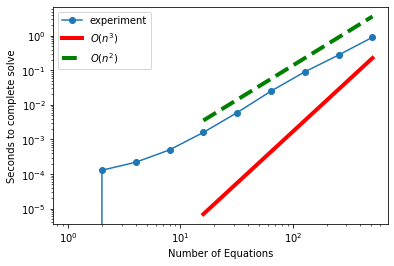

In [33]:
import time

# Number of times to repeat the test for each size
num_tests = 10

# Values of N to test
N = 2**np.arange(num_tests)

# Store timing results
times = np.zeros(num_tests)

# Loop over tests
for test in range(1,num_tests):
    # generate random linear system
    A = np.random.rand(N[test],N[test])
    b = np.dot(A,np.ones(N[test]))
    x = np.zeros(N[test])
    
    # start timer
    start = time.perf_counter()
    
    # run Gaussian elimination
    aug = GaussElim(A,b)
    x = BackSub(aug)
    
    # end time
    end = time.perf_counter()
    
    # store time result
    times[test] = end-start
    
# create log-log plot
plt.loglog(N,times,'o-',label="experiment")

#make a comparison line with slope 2^3
y_comp = times.copy()/4
for comp_place in range(num_tests-1,0,-1):
    #because x goes up by factor 2 each time, time should go up by 8 
    y_comp[comp_place -1] = np.exp(np.log(y_comp[test])-3*(np.log(N[test])-np.log(N[comp_place-1])))
plt.loglog(N[4:num_tests],y_comp[4:num_tests],'r',linewidth=4,label="$O(n^3)$")

#make a comparison line with slope 2^2
y_comp = times.copy()*4
for comp_place in range(num_tests-1,0,-1):
    y_comp[comp_place -1] = np.exp(np.log(y_comp[test])-2*(np.log(N[test])-np.log(N[comp_place-1])))
plt.loglog(N[4:num_tests],y_comp[4:num_tests],'g--',linewidth=4,label="$O(n^2)$")

# add labels and legend
plt.xlabel("Number of Equations")
plt.ylabel("Seconds to complete solve")
plt.legend()
plt.show()

In this figure the red line is a slope of 3 on a log-log scale (which corresponds time growing as the number of equations to the third power).  If the time to solve a system was consistent with the theory, then these dots would be parallel to the red line.  That assumes that the time it takes to execute the code is linearly related to the number of floating point operations. 
The actual slope is closer to 2, the slope of the green dashed line.  This implies that the time to solution is not growing as fast as the theory.  The reason for this is that python (probably numpy) is helping us out and grouping operations together and executing some of them in parallel so that the number of floating point operations is not linearly related to the time.